In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [210]:
data_file = "audio_features.csv"

df = pd.read_csv(data_file)
pd.set_option('display.max_columns', None)
df

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,mel_0,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,mel_10,mel_11,mel_12,mel_13,mel_14,mel_15,mel_16,mel_17,mel_18,mel_19,mel_20,mel_21,mel_22,mel_23,mel_24,mel_25,mel_26,mel_27,mel_28,mel_29,mel_30,mel_31,mel_32,mel_33,mel_34,mel_35,mel_36,mel_37,mel_38,mel_39,mel_40,mel_41,mel_42,mel_43,mel_44,mel_45,mel_46,mel_47,mel_48,mel_49,mel_50,mel_51,mel_52,mel_53,mel_54,mel_55,mel_56,mel_57,mel_58,mel_59,mel_60,mel_61,mel_62,mel_63,mel_64,mel_65,mel_66,mel_67,mel_68,mel_69,mel_70,mel_71,mel_72,mel_73,mel_74,mel_75,mel_76,mel_77,mel_78,mel_79,mel_80,mel_81,mel_82,mel_83,mel_84,mel_85,mel_86,mel_87,mel_88,mel_89,mel_90,mel_91,mel_92,mel_93,mel_94,mel_95,mel_96,mel_97,mel_98,mel_99,mel_100,mel_101,mel_102,mel_103,mel_104,mel_105,mel_106,mel_107,mel_108,mel_109,mel_110,mel_111,mel_112,mel_113,mel_114,mel_115,mel_116,mel_117,mel_118,mel_119,mel_120,mel_121,mel_122,mel_123,mel_124,mel_125,mel_126,mel_127,lyric_0,lyric_1,lyric_2,lyric_3,lyric_4,lyric_5,lyric_6,lyric_7,lyric_8,lyric_9,lyric_10,lyric_11,lyric_12,lyric_13,lyric_14,lyric_15,lyric_16,lyric_17,lyric_18,lyric_19,lyric_20,lyric_21,lyric_22,lyric_23,lyric_24,lyric_25,lyric_26,lyric_27,lyric_28,lyric_29,lyric_30,lyric_31,lyric_32,lyric_33,lyric_34,lyric_35,lyric_36,lyric_37,lyric_38,lyric_39,lyric_40,lyric_41,lyric_42,lyric_43,lyric_44,lyric_45,lyric_46,lyric_47,lyric_48,lyric_49,lyric_50,lyric_51,lyric_52,lyric_53,lyric_54,lyric_55,lyric_56,lyric_57,lyric_58,lyric_59,lyric_60,lyric_61,lyric_62,lyric_63,lyric_64,lyric_65,lyric_66,lyric_67,lyric_68,lyric_69,lyric_70,lyric_71,lyric_72,lyric_73,lyric_74,lyric_75,lyric_76,lyric_77,lyric_78,lyric_79,lyric_80,lyric_81,lyric_82,lyric_83,lyric_84,lyric_85,lyric_86,lyric_87,lyric_88,lyric_89,lyric_90,lyric_91,lyric_92,lyric_93,lyric_94,lyric_95,lyric_96,lyric_97,lyric_98,lyric_99,label
0,-177.53653,146.581310,-0.213761,41.228962,0.291190,19.701117,-14.081721,12.296306,-2.576464,-2.150595,4.339947,-4.343766,0.628467,-5.329404,0.075212,-4.354529,0.513913,-3.582065,-2.392741,-3.715229,0.411439,0.486644,0.550818,0.477316,0.499035,0.523470,0.365942,0.343171,0.375355,0.468421,0.397482,0.363219,103.075530,283.917600,190.964050,104.999500,70.826294,40.696760,48.396954,39.866318,48.330746,47.567070,65.594500,26.664543,16.059223,26.066881,8.023824,6.560778,9.290979,11.783270,12.171549,8.743134,11.207910,12.714543,5.688521,4.344077,6.815128,3.400586,5.094750,9.803142,4.099811,1.879592,2.263550,2.487741,4.108537,2.208640,1.719356,2.236730,2.016826,1.127379,0.972732,1.288436,0.872762,1.159349,1.022214,1.126490,1.198486,1.034105,0.933061,0.684346,1.020923,0.897400,0.647819,0.709234,0.713876,0.947022,0.908746,0.697249,1.016017,0.987729,0.663537,0.511290,0.727437,0.661066,0.636771,0.589480,0.584139,0.470780,0.568177,0.518038,0.511439,0.509263,0.355044,0.287939,0.290094,0.300506,0.236947,0.238290,0.215294,0.237830,0.212603,0.176991,0.154490,0.131374,0.116294,0.096092,0.094899,0.108742,0.088728,0.077661,0.088157,0.083618,0.075280,0.071812,0.074179,0.077172,0.067056,0.070895,0.065022,0.063768,0.076176,0.070324,0.069271,0.066738,0.077959,0.085333,0.079367,0.068581,0.054471,0.040985,0.034418,0.028478,0.025743,0.018835,0.011994,0.008142,0.006198,0.004648,0.001715,0.000130,1.715324e-09,8.726396e-10,2.951443e-10,2.019676e-10,3.808507e-10,1.879035e-10,3.153673e-10,1.235672e-10,3.696249e-10,1.710140e-10,0.000000,0.267746,0.029773,0.000000,0.030886,0.105489,0.000000,0.057496,0.000000,0.056977,0.096160,0.0,0.000000,0.000000,0.075456,0.000000,0.109496,0.000000,0.600857,0.127779,0.000000,0.000000,0.080406,0.139981,0.235972,0.341420,0.000000,0.000000,0.074296,0.000000,0.000000,0.036499,0.157806,0.067512,0.088955,0.000000,0.054160,0.000000,0.000000,0.024364,0.140671,0.128692,0.000000,0.000000,0.025392,0.10171

In [211]:
df['label'].value_counts()

,count
label,
Nhạc trẻ,1567
Trữ tình,1159
Hiphop,663
Thiếu nhi,484


In [212]:
X = df.iloc[:, :-1].values
y = pd.get_dummies(df["label"]).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
X.shape

(3873, 1, 260)

Label distribution in training set:
0    0.171078
1    0.404777
2    0.124919
3    0.299225
Name: proportion, dtype: float64

Label distribution in test set:
0    0.171613
1    0.403871
2    0.125161
3    0.299355
Name: proportion, dtype: float64


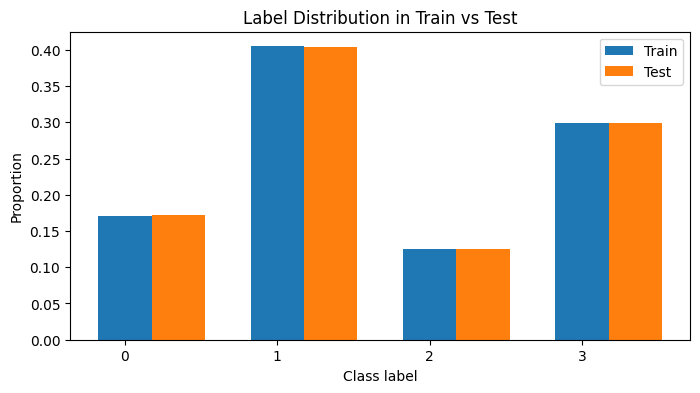


Features with significant distribution difference (KS-test p < 0.05):
Feature 0: KS statistic=0.059, p-value=0.02591
Feature 5: KS statistic=0.063, p-value=0.01413
Feature 36: KS statistic=0.057, p-value=0.03510
Feature 37: KS statistic=0.062, p-value=0.01613
Feature 38: KS statistic=0.058, p-value=0.03042
Feature 39: KS statistic=0.057, p-value=0.03515
Feature 41: KS statistic=0.057, p-value=0.03551
Feature 42: KS statistic=0.063, p-value=0.01359
Feature 43: KS statistic=0.060, p-value=0.02220
Feature 46: KS statistic=0.059, p-value=0.02626
Feature 56: KS statistic=0.062, p-value=0.01611
Feature 71: KS statistic=0.061, p-value=0.01794
Feature 77: KS statistic=0.057, p-value=0.03629
Feature 82: KS statistic=0.070, p-value=0.00440
Feature 84: KS statistic=0.066, p-value=0.00888
Feature 87: KS statistic=0.067, p-value=0.00685
Feature 90: KS statistic=0.065, p-value=0.00948
Feature 91: KS statistic=0.079, p-value=0.00078
Feature 92: KS statistic=0.071, p-value=0.00370
Feature 93: KS stat

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

train_label_counts = pd.Series(y_train_labels).value_counts(normalize=True).sort_index()
test_label_counts = pd.Series(y_test_labels).value_counts(normalize=True).sort_index()

print("Label distribution in training set:")
print(train_label_counts)
print("\nLabel distribution in test set:")
print(test_label_counts)

plt.figure(figsize=(8,4))
index = np.arange(len(train_label_counts))
bar_width = 0.35
plt.bar(index, train_label_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_label_counts, bar_width, label='Test')
plt.xlabel('Class label')
plt.ylabel('Proportion')
plt.title('Label Distribution in Train vs Test')
plt.xticks(index, train_label_counts.index)
plt.legend()
plt.show()

X_train_2d = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_test_2d = X_test.reshape(X_test.shape[0], X_test.shape[2])

ks_results = []
for i in range(X_train_2d.shape[1]):
    stat, p_value = ks_2samp(X_train_2d[:, i], X_test_2d[:, i])
    ks_results.append((i, stat, p_value))

print("\nFeatures with significant distribution difference (KS-test p < 0.05):")
for i, stat, p in ks_results:
    if p < 0.05:
        print(f"Feature {i}: KS statistic={stat:.3f}, p-value={p:.5f}")



In [214]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.2,
                       kernel_regularizer=l2(0.01)), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(16, dropout=0.3, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_train.shape[1], activation="softmax")
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_56                │ (None, 1, 64)          │        75,008 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,580 (314.77 KB)

 Trainable params: 80,420 (314.14 KB)

 Non-trainable params: 160 (640.00 B)

In [215]:
from tensorflow.keras.callbacks import ModelCheckpoint

early = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)


checkpoint = ModelCheckpoint(
    filepath="best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

callbacks = [early, reduce_lr, checkpoint]


In [216]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3054 - loss: 5.3379
Epoch 1: val_loss improved from inf to 3.73702, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.3070 - loss: 5.3196 - val_accuracy: 0.6723 - val_loss: 3.7370 - learning_rate: 0.0010
Epoch 2/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5171 - loss: 3.5888
Epoch 2: val_loss improved from 3.73702 to 2.92285, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5183 - loss: 3.5802 - val_accuracy: 0.8013 - val_loss: 2.9229 - learning_rate: 0.0010
Epoch 3/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6430 - loss: 2.8099
Epoch 3: val_loss improved from 2.92285 to 2.19664, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6445 - loss: 2.8008 - val_accuracy: 0.8465 - val_loss: 2.1966 - learning_rate: 0.0010
Epoch 4/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7330 - loss: 2.2340
Epoch 4: val_loss improved from 2.19664 to 1.67624, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7333 - loss: 2.2316 - val_accuracy: 0.8748 - val_loss: 1.6762 - learning_rate: 0.0010
Epoch 5/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7934 - loss: 1.7875
Epoch 5: val_loss improved from 1.67624 to 1.34009, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7934 - loss: 1.7847 - val_accuracy: 0.8903 - val_loss: 1.3401 - learning_rate: 0.0010
Epoch 6/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8224 - loss: 1.4812
Epoch 6: val_loss improved from 1.34009 to 1.11820, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8224 - loss: 1.4801 - val_accuracy: 0.8981 - val_loss: 1.1182 - learning_rate: 0.0010
Epoch 7/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8306 - loss: 1.2603
Epoch 7: val_loss improved from 1.11820 to 0.93406, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8305 - loss: 1.2596 - val_accuracy: 0.9058 - val_loss: 0.9341 - learning_rate: 0.0010
Epoch 8/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8323 - loss: 1.1080
Epoch 8: val_loss improved from 0.93406 to 0.81964, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8324 - loss: 1.1076 - val_accuracy: 0.9071 - val_loss: 0.8196 - learning_rate: 0.0010
Epoch 9/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8571 - loss: 0.9211
Epoch 9: val_loss improved from 0.81964 to 0.73526, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8567 - loss: 0.9215 - val_accuracy: 0.9071 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 10/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8461 - loss: 0.8643
Epoch 10: val_loss improved from 0.73526 to 0.65414, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8460 - loss: 0.8636 - val_accuracy: 0.9084 - val_loss: 0.6541 - learning_rate: 0.0010
Epoch 11/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8535 - loss: 0.8082
Epoch 11: val_loss improved from 0.65414 to 0.59400, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8534 - loss: 0.8078 - val_accuracy: 0.9148 - val_loss: 0.5940 - learning_rate: 0.0010
Epoch 12/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8638 - loss: 0.7049
Epoch 12: val_loss improved from 0.59400 to 0.55422, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8638 - loss: 0.7050 - val_accuracy: 0.9097 - val_loss: 0.5542 - learning_rate: 0.0010
Epoch 13/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8615 - loss: 0.6542
Epoch 13: val_loss improved from 0.55422 to 0.51704, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8614 - loss: 0.6545 - val_accuracy: 0.9071 - val_loss: 0.5170 - learning_rate: 0.0010
Epoch 14/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8549 - loss: 0.6542
Epoch 14: val_loss improved from 0.51704 to 0.50792, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8549 - loss: 0.6539 - val_accuracy: 0.9032 - val_loss: 0.5079 - learning_rate: 0.0010
Epoch 15/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8583 - loss: 0.6258
Epoch 15: val_loss improved from 0.50792 to 0.47747, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8583 - loss: 0.6257 - val_accuracy: 0.9071 - val_loss: 0.4775 - learning_rate: 0.0010
Epoch 16/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8623 - loss: 0.5927
Epoch 16: val_loss improved from 0.47747 to 0.46776, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8622 - loss: 0.5927 - val_accuracy: 0.9006 - val_loss: 0.4678 - learning_rate: 0.0010
Epoch 17/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8790 - loss: 0.5587
Epoch 17: val_loss improved from 0.46776 to 0.43850, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8783 - loss: 0.5593 - val_accuracy: 0.9058 - val_loss: 0.4385 - learning_rate: 0.0010
Epoch 18/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8610 - loss: 0.5846
Epoch 18: val_loss did not improve from 0.43850
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8614 - loss: 0.5835 - val_accuracy: 0.9019 - val_loss: 0.4540 - learning_rate: 0.0010
Epoch 19/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8615 - loss: 0.5423
Epoch 19: val_loss improved from 0.43850 to 0.42340, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8614 - loss: 0.5425 - val_accuracy: 0.9174 - val_loss: 0.4234 - learning_rate: 0.0010
Epoch 20/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8812 - loss: 0.5198
Epoch 20: val_loss did not improve from 0.42340
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8808 - loss: 0.5202 - val_accuracy: 0.9161 - val_loss: 0.4267 - learning_rate: 0.0010
Epoch 21/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8568 - loss: 0.5236
Epoch 21: val_loss did not improve from 0.42340
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8569 - loss: 0.5240 - val_accuracy: 0.9006 - val_loss: 0.4262 - learning_rate: 0.0010
Epoch 22/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8619 - loss: 0.5412
Epoch 22: val_loss did not improve from 0.42340
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8621 - loss: 0.5409 - val_accuracy: 0.9006 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 23/150
95/97 ━━━━━━━━━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8612 - loss: 0.5466 - val_accuracy: 0.9045 - val_loss: 0.4205 - learning_rate: 0.0010
Epoch 24/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8857 - loss: 0.4978
Epoch 24: val_loss improved from 0.42049 to 0.41490, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8849 - loss: 0.4991 - val_accuracy: 0.8994 - val_loss: 0.4149 - learning_rate: 0.0010
Epoch 25/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8673 - loss: 0.5343
Epoch 25: val_loss improved from 0.41490 to 0.40984, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8671 - loss: 0.5344 - val_accuracy: 0.9058 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 26/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8782 - loss: 0.5045
Epoch 26: val_loss improved from 0.40984 to 0.39787, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8778 - loss: 0.5053 - val_accuracy: 0.9135 - val_loss: 0.3979 - learning_rate: 0.0010
Epoch 27/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8631 - loss: 0.5082
Epoch 27: val_loss did not improve from 0.39787
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8632 - loss: 0.5086 - val_accuracy: 0.9135 - val_loss: 0.4005 - learning_rate: 0.0010
Epoch 28/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8619 - loss: 0.4942
Epoch 28: val_loss did not improve from 0.39787
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8622 - loss: 0.4945 - val_accuracy: 0.9006 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 29/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8687 - loss: 0.5074
Epoch 29: val_loss did not improve from 0.39787
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8687 - loss: 0.5076 - val_accuracy: 0.9084 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 30/150
94/97 ━━━━━━━━━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8707 - loss: 0.4973 - val_accuracy: 0.9252 - val_loss: 0.3812 - learning_rate: 5.0000e-04
Epoch 32/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8841 - loss: 0.4733
Epoch 32: val_loss improved from 0.38119 to 0.37044, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8841 - loss: 0.4732 - val_accuracy: 0.9200 - val_loss: 0.3704 - learning_rate: 5.0000e-04
Epoch 33/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8790 - loss: 0.4662
Epoch 33: val_loss improved from 0.37044 to 0.36266, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8791 - loss: 0.4659 - val_accuracy: 0.9213 - val_loss: 0.3627 - learning_rate: 5.0000e-04
Epoch 34/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8920 - loss: 0.4199
Epoch 34: val_loss improved from 0.36266 to 0.35343, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8918 - loss: 0.4206 - val_accuracy: 0.9161 - val_loss: 0.3534 - learning_rate: 5.0000e-04
Epoch 35/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8839 - loss: 0.4408
Epoch 35: val_loss improved from 0.35343 to 0.35003, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8839 - loss: 0.4411 - val_accuracy: 0.9200 - val_loss: 0.3500 - learning_rate: 5.0000e-04
Epoch 36/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8931 - loss: 0.4332
Epoch 36: val_loss did not improve from 0.35003
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8930 - loss: 0.4333 - val_accuracy: 0.9200 - val_loss: 0.3522 - learning_rate: 5.0000e-04
Epoch 37/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8855 - loss: 0.4334
Epoch 37: val_loss improved from 0.35003 to 0.34709, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8855 - loss: 0.4334 - val_accuracy: 0.9135 - val_loss: 0.3471 - learning_rate: 5.0000e-04
Epoch 38/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8824 - loss: 0.4333
Epoch 38: val_loss improved from 0.34709 to 0.33758, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8823 - loss: 0.4335 - val_accuracy: 0.9187 - val_loss: 0.3376 - learning_rate: 5.0000e-04
Epoch 39/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8794 - loss: 0.4450
Epoch 39: val_loss did not improve from 0.33758
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8794 - loss: 0.4449 - val_accuracy: 0.9265 - val_loss: 0.3398 - learning_rate: 5.0000e-04
Epoch 40/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8801 - loss: 0.4205
Epoch 40: val_loss did not improve from 0.33758
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8801 - loss: 0.4206 - val_accuracy: 0.9213 - val_loss: 0.3379 - learning_rate: 5.0000e-04
Epoch 41/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8869 - loss: 0.4088
Epoch 41: val_loss improved from 0.33758 to 0.33050, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8865 - loss: 0.4096 - val_accuracy: 0.9239 - val_loss: 0.3305 - learning_rate: 5.0000e-04
Epoch 42/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8949 - loss: 0.4037
Epoch 42: val_loss did not improve from 0.33050
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8947 - loss: 0.4040 - val_accuracy: 0.9213 - val_loss: 0.3346 - learning_rate: 5.0000e-04
Epoch 43/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8923 - loss: 0.4256
Epoch 43: val_loss did not improve from 0.33050
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8920 - loss: 0.4256 - val_accuracy: 0.9187 - val_loss: 0.3440 - learning_rate: 5.0000e-04
Epoch 44/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8877 - loss: 0.4098
Epoch 44: val_loss did not improve from 0.33050
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8877 - loss: 0.4102 - val_accuracy: 0.9200 - val_loss: 0.3390 - learning_rate: 5.0000e-04
Epoch 45/150
94/97 

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8792 - loss: 0.4413 - val_accuracy: 0.9174 - val_loss: 0.3285 - learning_rate: 2.5000e-04
Epoch 47/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8898 - loss: 0.3992
Epoch 47: val_loss improved from 0.32851 to 0.32048, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8896 - loss: 0.3995 - val_accuracy: 0.9239 - val_loss: 0.3205 - learning_rate: 2.5000e-04
Epoch 48/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9064 - loss: 0.3747
Epoch 48: val_loss improved from 0.32048 to 0.32013, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9063 - loss: 0.3748 - val_accuracy: 0.9252 - val_loss: 0.3201 - learning_rate: 2.5000e-04
Epoch 49/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8962 - loss: 0.3784
Epoch 49: val_loss did not improve from 0.32013
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8962 - loss: 0.3785 - val_accuracy: 0.9148 - val_loss: 0.3226 - learning_rate: 2.5000e-04
Epoch 50/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8839 - loss: 0.3887
Epoch 50: val_loss did not improve from 0.32013
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8840 - loss: 0.3887 - val_accuracy: 0.9239 - val_loss: 0.3205 - learning_rate: 2.5000e-04
Epoch 51/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8929 - loss: 0.3840
Epoch 51: val_loss did not improve from 0.32013
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8929 - loss: 0.3840 - val_accuracy: 0.9252 - val_loss: 0.3211 - learning_rate: 2.5000e-04
Epoch 52/150
97/97 

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9019 - loss: 0.3647 - val_accuracy: 0.9226 - val_loss: 0.3162 - learning_rate: 1.2500e-04
Epoch 54/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8957 - loss: 0.3817
Epoch 54: val_loss improved from 0.31619 to 0.31519, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8956 - loss: 0.3814 - val_accuracy: 0.9252 - val_loss: 0.3152 - learning_rate: 1.2500e-04
Epoch 55/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8910 - loss: 0.3854
Epoch 55: val_loss improved from 0.31519 to 0.31301, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8911 - loss: 0.3852 - val_accuracy: 0.9239 - val_loss: 0.3130 - learning_rate: 1.2500e-04
Epoch 56/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9044 - loss: 0.3597
Epoch 56: val_loss improved from 0.31301 to 0.31225, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9043 - loss: 0.3597 - val_accuracy: 0.9213 - val_loss: 0.3123 - learning_rate: 1.2500e-04
Epoch 57/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8979 - loss: 0.3490
Epoch 57: val_loss improved from 0.31225 to 0.30927, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8978 - loss: 0.3491 - val_accuracy: 0.9226 - val_loss: 0.3093 - learning_rate: 1.2500e-04
Epoch 58/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8975 - loss: 0.3531
Epoch 58: val_loss improved from 0.30927 to 0.30769, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8975 - loss: 0.3535 - val_accuracy: 0.9187 - val_loss: 0.3077 - learning_rate: 1.2500e-04
Epoch 59/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9049 - loss: 0.3523
Epoch 59: val_loss improved from 0.30769 to 0.30337, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9049 - loss: 0.3524 - val_accuracy: 0.9303 - val_loss: 0.3034 - learning_rate: 1.2500e-04
Epoch 60/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9097 - loss: 0.3298
Epoch 60: val_loss did not improve from 0.30337
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9096 - loss: 0.3302 - val_accuracy: 0.9252 - val_loss: 0.3037 - learning_rate: 1.2500e-04
Epoch 61/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8970 - loss: 0.3701
Epoch 61: val_loss did not improve from 0.30337
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8972 - loss: 0.3692 - val_accuracy: 0.9226 - val_loss: 0.3038 - learning_rate: 1.2500e-04
Epoch 62/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9113 - loss: 0.3216
Epoch 62: val_loss improved from 0.30337 to 0.30075, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9112 - loss: 0.3218 - val_accuracy: 0.9252 - val_loss: 0.3007 - learning_rate: 1.2500e-04
Epoch 63/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9040 - loss: 0.3523
Epoch 63: val_loss did not improve from 0.30075
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9037 - loss: 0.3529 - val_accuracy: 0.9226 - val_loss: 0.3039 - learning_rate: 1.2500e-04
Epoch 64/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8900 - loss: 0.3863
Epoch 64: val_loss did not improve from 0.30075
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8901 - loss: 0.3858 - val_accuracy: 0.9265 - val_loss: 0.3018 - learning_rate: 1.2500e-04
Epoch 65/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9004 - loss: 0.3404
Epoch 65: val_loss improved from 0.30075 to 0.29668, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9005 - loss: 0.3404 - val_accuracy: 0.9265 - val_loss: 0.2967 - learning_rate: 1.2500e-04
Epoch 66/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9084 - loss: 0.3316
Epoch 66: val_loss did not improve from 0.29668
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9083 - loss: 0.3318 - val_accuracy: 0.9290 - val_loss: 0.2990 - learning_rate: 1.2500e-04
Epoch 67/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8980 - loss: 0.3690
Epoch 67: val_loss did not improve from 0.29668
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8982 - loss: 0.3685 - val_accuracy: 0.9226 - val_loss: 0.2983 - learning_rate: 1.2500e-04
Epoch 68/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9036 - loss: 0.3486
Epoch 68: val_loss did not improve from 0.29668
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9036 - loss: 0.3486 - val_accuracy: 0.9252 - val_loss: 0.2973 - learning_rate: 1.2500e-04
Epoch 69/150
95/97 

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9043 - loss: 0.3336 - val_accuracy: 0.9213 - val_loss: 0.2958 - learning_rate: 6.2500e-05
Epoch 71/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9098 - loss: 0.3201
Epoch 71: val_loss did not improve from 0.29579
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9096 - loss: 0.3205 - val_accuracy: 0.9226 - val_loss: 0.2958 - learning_rate: 6.2500e-05
Epoch 72/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9031 - loss: 0.3389
Epoch 72: val_loss did not improve from 0.29579
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9032 - loss: 0.3387 - val_accuracy: 0.9239 - val_loss: 0.2968 - learning_rate: 6.2500e-05
Epoch 73/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9042 - loss: 0.3428
Epoch 73: val_loss did not improve from 0.29579
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9043 - loss: 0.3426 - val_accuracy: 0.9226 - val_loss: 0.2969 - learning_rate: 6.2500e-05
Epoch 74/150
94/97 

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8939 - loss: 0.3594 - val_accuracy: 0.9213 - val_loss: 0.2957 - learning_rate: 3.1250e-05
Epoch 76/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9045 - loss: 0.3403
Epoch 76: val_loss improved from 0.29567 to 0.29502, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9045 - loss: 0.3403 - val_accuracy: 0.9239 - val_loss: 0.2950 - learning_rate: 3.1250e-05
Epoch 77/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9150 - loss: 0.3085
Epoch 77: val_loss improved from 0.29502 to 0.29363, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9147 - loss: 0.3091 - val_accuracy: 0.9213 - val_loss: 0.2936 - learning_rate: 3.1250e-05
Epoch 78/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9076 - loss: 0.3239
Epoch 78: val_loss did not improve from 0.29363
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9076 - loss: 0.3239 - val_accuracy: 0.9213 - val_loss: 0.2951 - learning_rate: 3.1250e-05
Epoch 79/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9116 - loss: 0.3191
Epoch 79: val_loss did not improve from 0.29363
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9114 - loss: 0.3192 - val_accuracy: 0.9213 - val_loss: 0.2969 - learning_rate: 3.1250e-05
Epoch 80/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9124 - loss: 0.3166
Epoch 80: val_loss did not improve from 0.29363
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9125 - loss: 0.3163 - val_accuracy: 0.9226 - val_loss: 0.2972 - learning_rate: 3.1250e-05
Epoch 81/150
97/97 

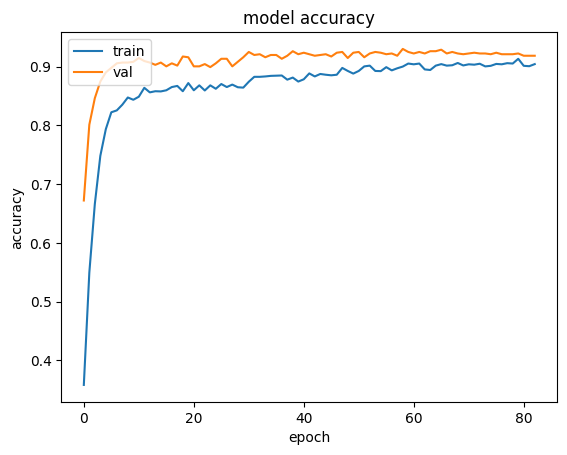

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

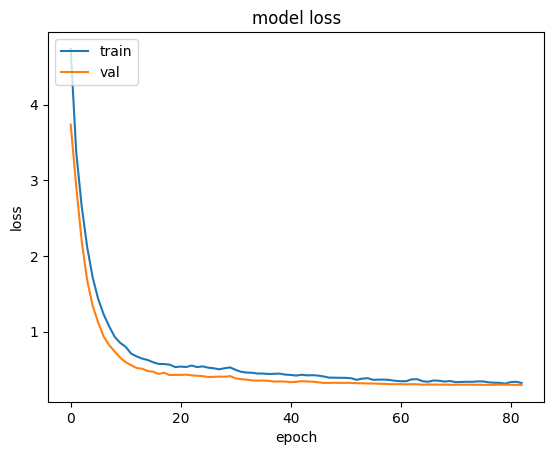

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

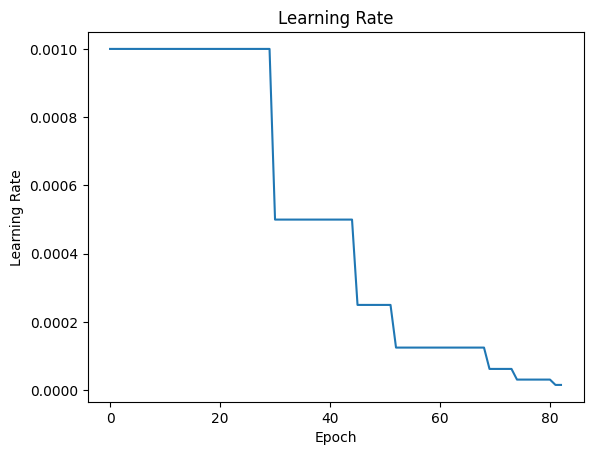

In [222]:
# plot learning rate
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step


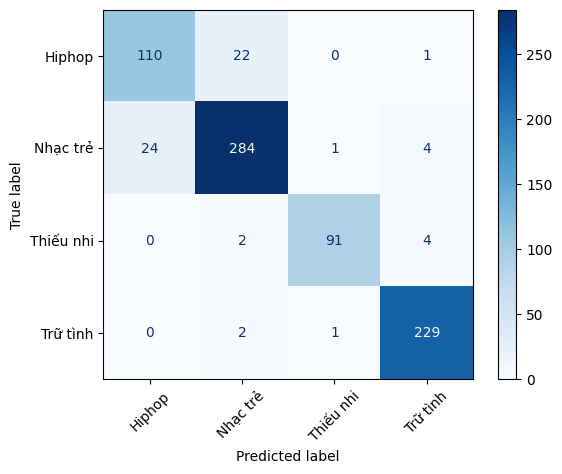

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = pd.get_dummies(df["label"]).columns.tolist()

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_text)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [223]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       133
           1       0.92      0.91      0.91       313
           2       0.98      0.94      0.96        97
           3       0.96      0.99      0.97       232

    accuracy                           0.92       775
   macro avg       0.92      0.91      0.92       775
weighted avg       0.92      0.92      0.92       775



In [224]:
import pickle
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = ['Hiphop', 'Nhạc trẻ', 'Thiếu nhi', 'Trữ tình']

cm = confusion_matrix(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes, target_names=labels_text, output_dict=True)

history = {
    'loss': history.history['loss'],
    'val_loss': history.history.get('val_loss'),
    'accuracy': history.history.get('accuracy'),
    'val_accuracy': history.history.get('val_accuracy'),
    'learning_rate': history.history.get('learning_rate'),
    'confusion_matrix': cm,
    'classification_report': report,
    'labels_text': labels_text,
}

with open('history.pkl', 'wb') as f:
    pickle.dump(history, f)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [225]:
from google.colab import files
files.download("best_model.h5")
files.download('history.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>